In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn import preprocessing
dtype = torch.float64
device = torch.device("cuda:0")
torch.manual_seed(42)
data = pd.read_csv("NN_training_big.nn")
np.random.seed(42)

ModuleNotFoundError: No module named 'torch'

In [2]:
data.head()

NameError: name 'data' is not defined

In [19]:
sections = data["Track Section"].to_numpy(dtype=int)
sections

array([   0,    0, 2580, ...,    0,    0,    0])

In [20]:
len(sections)

16681

In [21]:
set_s = []
for c, v in enumerate(sections):
    
    

3883

In [ ]:
identify transition to from track number to succesive track number as there is more data (rather than identifying track position)

have a look at an embedding layer

stock price with lstm example

In [22]:
lin_set = np.arange(0, len(set_s))
len(lin_set)

3883

In [26]:
lin_set[0:5]

array([0, 1, 2, 3, 4])

In [28]:
sections[0:5]

array([   0,    0, 2580, 2580, 2580])

In [23]:
data["n_sec"] = 0
data.head()

,Unnamed: 0,Actual Velocity,Track Section,0_x,10_x,20_x,30_x,40_x,50_x,60_x,...,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y,n_sec
0,0,24.0,0.0,0.002890,0.002176,0.004270,0.007065,0.009169,0.008229,0.006080,...,0.001679,0.001001,0.001741,0.001173,0.001034,0.441387,0.353673,1.135934,6.148501,0
1,3,25.0,0.0,0.006483,0.012145,0.016721,0.014323,0.019283,0.015196,0.018086,...,0.001161,0.001255,0.001117,0.000859,0.001176,0.435271,0.328850,1.205422,6.901017,0
2,5,25.0,2580.0,0.006075,0.026636,0.049570,0.035475,0.045464,0.058989,0.035533,...,0.000910,0.001677,0.001872,0.001693,0.001617,0.492657,0.398906,1.274077,2.885397,0
3,7,24.0,2580.0,0.006267,0.005948,0.009482,0.013067,0.011271,0.009465,0.012031,...,0.001065,0.001259,0.001687,0.001401,0.001769,0.452549,0.330364,1.290717,3.406660,0
4,6,25.0,2580.0,0.006267,0.005948,0.009482,0.013067,0.011271,0.009465,0.012031,...,0.001065,0.001259,0.001687,0.001401,0.001769,0.452549,0.330364,1.290717,3.406660,0


In [24]:
for c,v in enumerate(set_s):
    data.loc[data["Track Section"] == v,"n_sec"] = lin_set[c]
data.head(10)

,Unnamed: 0,Actual Velocity,Track Section,0_x,10_x,20_x,30_x,40_x,50_x,60_x,...,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y,n_sec
0,0,24.0,0.0,0.002890,0.002176,0.004270,0.007065,0.009169,0.008229,0.006080,...,0.001679,0.001001,0.001741,0.001173,0.001034,0.441387,0.353673,1.135934,6.148501,0
1,3,25.0,0.0,0.006483,0.012145,0.016721,0.014323,0.019283,0.015196,0.018086,...,0.001161,0.001255,0.001117,0.000859,0.001176,0.435271,0.328850,1.205422,6.901017,0
2,5,25.0,2580.0,0.006075,0.026636,0.049570,0.035475,0.045464,0.058989,0.035533,...,0.000910,0.001677,0.001872,0.001693,0.001617,0.492657,0.398906,1.274077,2.885397,1669
3,7,24.0,2580.0,0.006267,0.005948,0.009482,0.013067,0.011271,0.009465,0.012031,...,0.001065,0.001259,0.001687,0.001401,0.001769,0.452549,0.330364,1.290717,3.406660,1669
4,6,25.0,2580.0,0.006267,0.005948,0.009482,0.013067,0.011271,0.009465,0.012031,...,0.001065,0.001259,0.001687,0.001401,0.001769,0.452549,0.330364,1.290717,3.406660,1669
5,9,24.0,2580.0,0.006176,0.005300,0.005865,0.007127,0.013677,0.011861,0.011872,...,0.001229,0.001405,0.001101,0.001418,0.001193,0.730326,0.607439,1.828327,3.858335,1669
6,11,25.0,2580.0,0.001659,0.002093,0.005951,0.009888,0.013573,0.014407,0.018021,...,0.001471,0.001366,0.001166,0.001405,0.001772,0.780648,0.637179,2.027838,3.911854,1669
7,12,24.0,2580.0,0.001659,0.002093,0.005951,0.009888,0.013573,0.014407,0.018021,...,0.001471,0.001366,0.001166,0.001405,0.001772,0.780648,0.637179,2.027838,3.911854,1669
8,15,24.0,2580.0,0.002486,0.003253,0.006224,0.007712,0.009611,0.010210,0.015296,...,0.001624,0.001523,0.001350,0.001761,0.001668,1.339070,1.127216,3.261054,9.142879,1669
9,13,25.0,2580.0,0.002486,0.003253,0.006224,0.007712,0.009611,0.010210,0.015296,...,0.001624,0.001523,0.001350,0.001761,0.001668,1.339070,1.127216,3.261054,9.142879,1669


In [25]:
data.iloc[549:555,:]

,Unnamed: 0,Actual Velocity,Track Section,0_x,10_x,20_x,30_x,40_x,50_x,60_x,...,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y,n_sec
549,739,11.0,2287.0,0.002738,0.003522,0.004387,0.008377,0.014554,0.011013,0.012808,...,0.000308,0.000466,0.000285,0.000277,0.000422,0.191980,0.157971,0.485452,0.982235,1408
550,740,13.0,2287.0,0.002738,0.003522,0.004387,0.008377,0.014554,0.011013,0.012808,...,0.000308,0.000466,0.000285,0.000277,0.000422,0.191980,0.157971,0.485452,0.982235,1408
551,741,14.0,2286.0,0.002275,0.005443,0.007341,0.010291,0.017490,0.009256,0.010632,...,0.000358,0.000462,0.000438,0.000464,0.000518,0.275826,0.230450,0.680601,1.381370,1407
552,742,16.0,2286.0,0.002275,0.005443,0.007341,0.010291,0.017490,0.009256,0.010632,...,0.000358,0.000462,0.000438,0.000464,0.000518,0.275826,0.230450,0.680601,1.381370,1407
553,743,17.0,2286.0,0.002752,0.005463,0.012324,0.015007,0.011506,0.010475,0.016560,...,0.000751,0.000724,0.000490,0.000610,0.000519,0.331725,0.278312,0.830921,2.938875,1407
554,744,19.0,2286.0,0.002752,0.005463,0.012324,0.015007,0.011506,0.010475,0.016560,...,0.000751,0.000724,0.000490,0.000610,0.000519,0.331725,0.278312,0.830921,2.938875,1407


In [3]:
data.iloc[0,2]

0.0

next cell is a little confusing
we scale the acceleration data (and not the target variables, actual velocity and track section)
then we add back in the target variable speed.
Then we split into training, test and validate datasets.

In [4]:
x = data.iloc[:,3:].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
d2 = pd.DataFrame(x_scaled)
d2["speed"] = data.iloc[:,1]
d2["position"] = data.iloc[:,2]
train, validate, test = np.split(d2.sample(frac=1), [int(.6*len(d2)), int(.8*len(d2))])

In [5]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,512,513,514,515,516,517,518,519,speed,position
3550,0.010099,0.021588,0.049999,0.088078,0.117660,0.049765,0.084076,0.067283,0.088958,0.040784,...,0.024060,0.030991,0.039655,0.022967,0.037144,0.041040,0.034307,0.005648,23.0,2199.0
5485,0.008576,0.009916,0.012575,0.029051,0.067485,0.026453,0.046955,0.046833,0.063882,0.031429,...,0.053903,0.103253,0.069641,0.067565,0.227454,0.252822,0.208983,0.028252,48.0,432.0
6333,0.007292,0.001301,0.001128,0.000434,0.000534,0.000708,0.000425,0.000290,0.000245,0.000245,...,0.000350,0.000432,0.000440,0.000302,0.000231,0.000281,0.000189,0.000022,0.0,562.0
8761,0.008598,0.019744,0.039594,0.044089,0.043925,0.044670,0.043309,0.048980,0.034009,0.045778,...,0.073926,0.076121,0.076406,0.083847,0.129156,0.144060,0.115538,0.021259,42.0,578.0
2251,0.004275,0.011459,0.052137,0.039511,0.049870,0.028937,0.038315,0.025265,0.030428,0.016046,...,0.050154,0.061178,0.055470,0.053300,0.057702,0.066268,0.051596,0.008187,35.0,4096.0


In [6]:
train.speed.max()

81.0

In [7]:
x_tr = torch.from_numpy(train.iloc[:,:-2].to_numpy())
x_te = torch.from_numpy(test.iloc[:,:-2].to_numpy())
x_va = torch.from_numpy(validate.iloc[:,:-2].to_numpy())

y_tr = torch.from_numpy(train.iloc[:,-2:].to_numpy())
y_te = torch.from_numpy(test.iloc[:,-2:].to_numpy())
y_va = torch.from_numpy(validate.iloc[:,-2:].to_numpy())

In [8]:
y_tr.shape

torch.Size([5598, 2])

In [9]:
x_tr.shape

torch.Size([5598, 520])

In [10]:
x_tr = x_tr.float().cuda()
x_te = x_te.float().cuda()
x_va = x_va.float().cuda()

y_tr = y_tr.float().cuda()
y_te = y_te.float().cuda()
y_va = y_va.float().cuda()

In [13]:
l_rate = 1e-5

input_dim, hiden_dim, h2, h3, h4, h5, h6, output_dim = 520, 520, 250, 250, 125, 125, 30, y_tr.shape[1]
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hiden_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(hiden_dim, h2),
    torch.nn.ReLU(),
    torch.nn.Linear(h2, h3),
    torch.nn.ReLU(),
    torch.nn.Linear(h3, h4),
    torch.nn.ReLU(),
    torch.nn.Linear(h4, h5),
    torch.nn.ReLU(),
    torch.nn.Linear(h5, h6),
    torch.nn.ReLU(),
    torch.nn.Linear(h6, output_dim),
)
model.cuda()
loss_fn = torch.nn.MSELoss(reduction="sum")
losses_train = []
losses_test = []
times = []

training error:     99  26402820096.000
test error:         99  8811963392.000
training error:   1099  16677101568.000
test error:       1099  5669199872.000
training error:   2099  16163856384.000
test error:       2099  5502284288.000
training error:   3099  15112667136.000
test error:       3099  5152516096.000
training error:   4099  9391860736.000
test error:       4099  3236823552.000
training error:   5099  7730492928.000
test error:       5099  2759946240.000
training error:   6099  7063881216.000
test error:       6099  2588975360.000
training error:   7099  6423940096.000
test error:       7099  2442252288.000
training error:   8099  5739388928.000
test error:       8099  2290426368.000
training error:   9099  4993655808.000
test error:       9099  2107991168.000
training error:  10099  4218588160.000
test error:      10099  1919016192.000
training error:  11099  3482713600.000
test error:      11099  1768783616.000
training error:  12099  2915208448.000
test error:      1209

<AxesSubplot:xlabel='time', ylabel='test_l'>

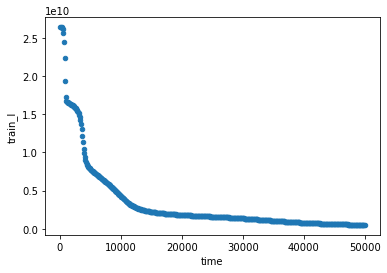

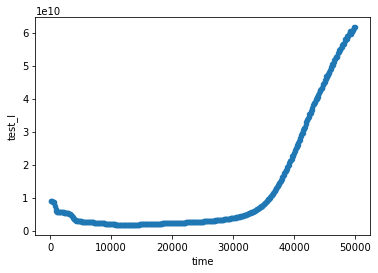

In [14]:
# scheduler = optim.X(optimizer,...)      # create lr scheduler
# scheduler.step()                        # update lr at start of epoch
# optim.lr_scheduler.X                    # where X is LambdaLR, StepLR, MultiStepLR,
              # ExponentialLR or ReduceLROnPLateau
learning_rate = 1e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor = 0.2, verbose = True)
for t in range(50000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x_tr)

    # Compute and print loss.
    loss = loss_fn(y_pred, y_tr)
    if t % 1000 == 99:
        print("{:16}{:6}  {:5.3f}".format("training error:", t, loss.item()))
        y_test = model(x_te)
        loss_te = loss_fn(y_test, y_te)
        print("{:16}{:6}  {:5.3f}".format("test error:", t, loss_te.item()))
    if t % 100 == 99:
#         print("{:16}{:6}  {:5.3f}".format("training error:", t, loss.item()))
        y_test = model(x_te)
        loss_te = loss_fn(y_test, y_te)
#         print("{:16}{:6}  {:5.3f}".format("test error:", t, loss_te.item()))
        losses_train.append(loss.item())
        losses_test.append(loss_te.item())
        times.append(t)

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
#     scheduler.step(loss)
stats = pd.DataFrame({"train_l":losses_train, "test_l":losses_test, "time":times})
# stats.plot(x="time", y=["train_l", "test_l"], kind="scatter")
stats.plot(x="time", y="train_l", kind="scatter")
stats.plot(x="time", y="test_l", kind="scatter")

<AxesSubplot:xlabel='time', ylabel='test_l'>

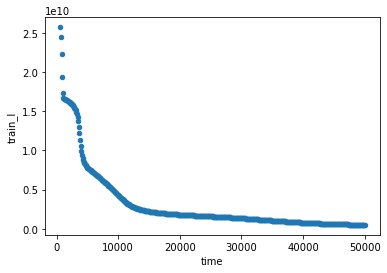

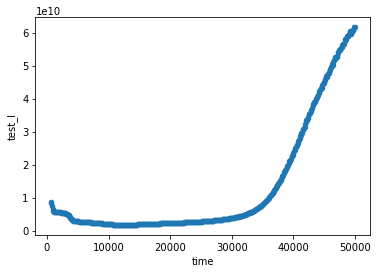

In [15]:
stats.iloc[5:,:].plot(x="time", y="train_l", kind="scatter")
stats.iloc[5:,:].plot(x="time", y="test_l", kind="scatter")

<AxesSubplot:xlabel='time', ylabel='test_l'>

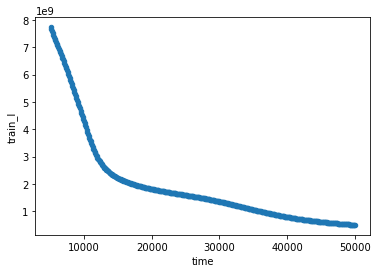

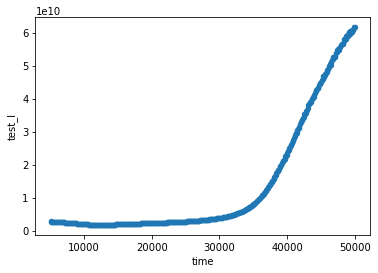

In [16]:
stats.iloc[50:,:].plot(x="time", y="train_l", kind="scatter")
stats.iloc[50:,:].plot(x="time", y="test_l", kind="scatter")

In [17]:
df1 = pd.read_csv("01-08-19-V118_ch1.big" , index_col = 0)
df2 = pd.read_csv("01-08-19-V118_ch2.big" , index_col = 0)

In [18]:
df1 = df1.reset_index()
df2 = df2.reset_index()

In [19]:
df = pd.merge(df1, df2, how = "outer", on = "index")
df.head()

,index,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,2500_y,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y
0,0,0.002283,0.001861,0.001776,0.002652,0.004631,0.009036,0.007076,0.006394,0.007697,...,0.002245,0.001517,0.001681,0.001096,0.001384,0.001165,1.198058,0.982748,3.083282,7.179362
1,1,0.002964,0.002919,0.003401,0.003421,0.005504,0.007987,0.007737,0.006090,0.006359,...,0.001800,0.001058,0.001129,0.001639,0.001557,0.001575,1.226540,1.033503,3.092825,6.464596
2,2,0.004012,0.003644,0.004012,0.004476,0.006040,0.007929,0.008039,0.007646,0.011035,...,0.000736,0.001267,0.001046,0.001271,0.000913,0.001316,1.040367,0.884531,2.612213,5.477276
3,3,0.001981,0.002050,0.003021,0.002484,0.004625,0.006709,0.007154,0.006420,0.006462,...,0.001464,0.001167,0.001430,0.001136,0.001324,0.000884,1.173504,1.040558,2.719463,5.129313
4,4,0.001982,0.001520,0.002056,0.002422,0.006100,0.005771,0.007166,0.006682,0.012416,...,0.001787,0.001507,0.001729,0.001084,0.001341,0.001238,1.194421,0.971220,3.084037,7.484677


In [20]:
x_ch = torch.from_numpy(min_max_scaler.transform(df.iloc[:,1:].values))
x_ch[0,0]

tensor(0.0094, dtype=torch.float64)

In [21]:
x_ch = x_ch.float()
x_ch[0,0]

tensor(0.0094)

In [22]:
x_ch = x_ch.to(device)
x_ch[0,0]

tensor(0.0094, device='cuda:0')

In [23]:
x_ch.device

device(type='cuda', index=0)

In [24]:
x_ch.shape

torch.Size([7200, 520])

In [25]:
y_ch = model(x_ch)

In [26]:
y_ch.shape

torch.Size([7200, 2])

In [27]:
ch_np = y_ch.cpu().detach().numpy()
type(ch_np)

numpy.ndarray

In [28]:
ch_np.shape

(7200, 2)

In [29]:
df4 = pd.DataFrame(min_max_scaler.fit_transform(df.iloc[:,1:].values))

In [30]:
df4["speed", "position"] = ch_np

ValueError: Wrong number of items passed 2, placement implies 1

In [ ]:
df4.head()

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
plotdf = df4.reset_index()

In [ ]:
plotdf.head()

In [ ]:
plt.figure(figsize= (30, 30))
g = sb.scatterplot(x = "index", y = "speed", data = plotdf, alpha = 0.2, color ="b")
g = sb.scatterplot(x = "index", y = data.iloc[:,-2], data = plotdf, alpha = 0.2, color ="r")

In [ ]:
plt.figure(figsize= (30, 30))
sb.lineplot(x = "index", y = "speed", data = plotdf.iloc[0:1000,:], color ="b")
# sb.lineplot(x = "index", y = "speed", data = plotdf.iloc[0:1000,:], alpha = 0.2, color ="b")

In [ ]:
plt.figure(figsize= (30, 30))
g = sb.lineplot(x = "index", y = "speed", data = plotdf, alpha = 0.2, color ="b")
g = sb.lineplot(x = "index", y = data.iloc[:,-2], data = plotdf, alpha = 0.2, color ="r")